# Introduction
This mini-project focuses on mining corpus data from Ch.G. Rosetti's free-to-use poems. Additionally, accuracy of pos-tagging using NLTK and Stanford's Stanza is compared. Finally, some linguistic insights are drawn from the analysed vocabulary of the poems

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

import string
import re
import random

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import spacy
nlp = spacy.load('en_core_web_sm')
from collections import Counter

!pip install stanza
import stanza
stanza.download('en')
nlps = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
#scraping Rossetti's poetry from Gutenberg.org using BeautifulSoup
build_response = requests.get('https://www.gutenberg.org/cache/epub/19188/pg19188-images.html')

cgr_text = build_response.content
soup = BeautifulSoup(cgr_text, "html.parser")
poetry = soup.get_text()

#preliminary cleaning
poetry = re.sub(r'\n', ' ', poetry)
poetry = re.sub(r'\r', ' ', poetry)
poetry = re.sub(r'\'s', ' ', poetry)
poetry = re.sub('\d', ' ', poetry)
poetry = re.sub('\xa0', ' ', poetry)
poetry = poetry.translate(str.maketrans(' ', ' ', string.punctuation))

In [44]:
#first, let's use nltk and spacy in conjunction to remove stopwords, lemmatize and assogn part-of-speech tags
poetry_tokens = poetry.split(" ")
poetry_tokens = [i for i in poetry_tokens if i]
poetry_tokens = poetry_tokens[264:-2875]
poetry_tokens[0:10]

['At',
 'Home',
 'From',
 'Sunset',
 'to',
 'Star',
 'Rise',
 'Love',
 'from',
 'the',
 'North',
 'Winter',
 'Rain',
 'A',
 'Dirge',
 'Confluents',
 'Noble',
 'Sisters',
 'Spring',
 'The',
 'Lambs',
 'of',
 'Grasmere',
 'A',
 'Birthday',
 'Remember',
 'After',
 'Death',
 'An',
 'End',
 'My',
 'Dream',
 'Song',
 'The',
 'Hour',
 'and',
 'the',
 'Ghost',
 'A',
 'Summer',
 'Wish',
 'An',
 'Apple',
 'Gathering',
 'Song',
 'Maude',
 'Clare',
 'Echo',
 'Winter',
 'My',
 'Secret',
 'Another',
 'Spring',
 'A',
 'Peal',
 'of',
 'Bells',
 'Fata',
 'Morgana',
 'No',
 'thank',
 'you',
 'John',
 'May',
 'A',
 'Pause',
 'of',
 'Thought',
 'Twilight',
 'Calm',
 'Wife',
 'to',
 'Husband',
 'Three',
 'Seasons',
 'Mirage',
 'Shut',
 'out',
 'Sound',
 'Sleep',
 'Song',
 'Song',
 'Dead',
 'before',
 'Death',
 'Bitter',
 'for',
 'Sweet',
 'The',
 'Master',
 'is',
 'Come',
 'and',
 'Calleth',
 'for',
 'Thee',
 'Rest',
 'The',
 'First',
 'Spring']

In [45]:
stopwords = nlp.Defaults.stop_words
#extending stopword list for poetic English
stopwords |= {'thou', 'thy', 'o', 'thee', 'said', 'away', 'till', 'shall', 'hath'}

#standardizing the words
poetry_tokens_clean = [word.lower() for word in poetry_tokens]
poetry_tokens_clean = [word for word in poetry_tokens_clean if word not in stopwords]
lemmatizer = WordNetLemmatizer()
lemmed_poetry = [lemmatizer.lemmatize(word) for word in poetry_tokens_clean]

#spacy was NOT accurate, hence nltk tagging
tagged_poetry = nltk.pos_tag(lemmed_poetry)
tagged_poetry[0:25]

[('home', 'NN'),
 ('sunset', 'NN'),
 ('star', 'NN'),
 ('rise', 'NN'),
 ('love', 'VB'),
 ('north', 'JJ'),
 ('winter', 'NN'),
 ('rain', 'NN'),
 ('dirge', 'NN'),
 ('confluent', 'NN'),
 ('noble', 'JJ'),
 ('sister', 'NN'),
 ('spring', 'NN'),
 ('lamb', 'NN'),
 ('grasmere', 'RB'),
 ('birthday', 'JJ'),
 ('remember', 'VB'),
 ('death', 'NN'),
 ('end', 'NN'),
 ('dream', 'NN'),
 ('song', 'NN'),
 ('hour', 'NN'),
 ('ghost', 'NN'),
 ('summer', 'NN'),
 ('wish', 'JJ')]

[('love', 396), ('day', 302), ('like', 214), ('come', 211), ('heart', 204), ('life', 202), ('sweet', 151), ('hand', 145), ('god', 144), ('night', 139), ('eye', 136), ('long', 128), ('death', 127), ('face', 121), ('rose', 108), ('hope', 99), ('sun', 98), ('sea', 95), ('song', 91), ('thing', 91), ('bird', 90), ('lord', 90), ('flower', 86), ('world', 84), ('spring', 83), ('rest', 83), ('head', 83), ('know', 81), ('wind', 80), ('earth', 80), ('sing', 80), ('way', 79), ('man', 78), ('fair', 78), ('leaf', 76), ('time', 76), ('today', 75), ('light', 75), ('home', 74), ('summer', 73), ('mother', 73), ('word', 72), ('let', 72), ('look', 71), ('little', 68), ('cold', 68), ('lie', 67), ('good', 67), ('fire', 67), ('set', 66)]


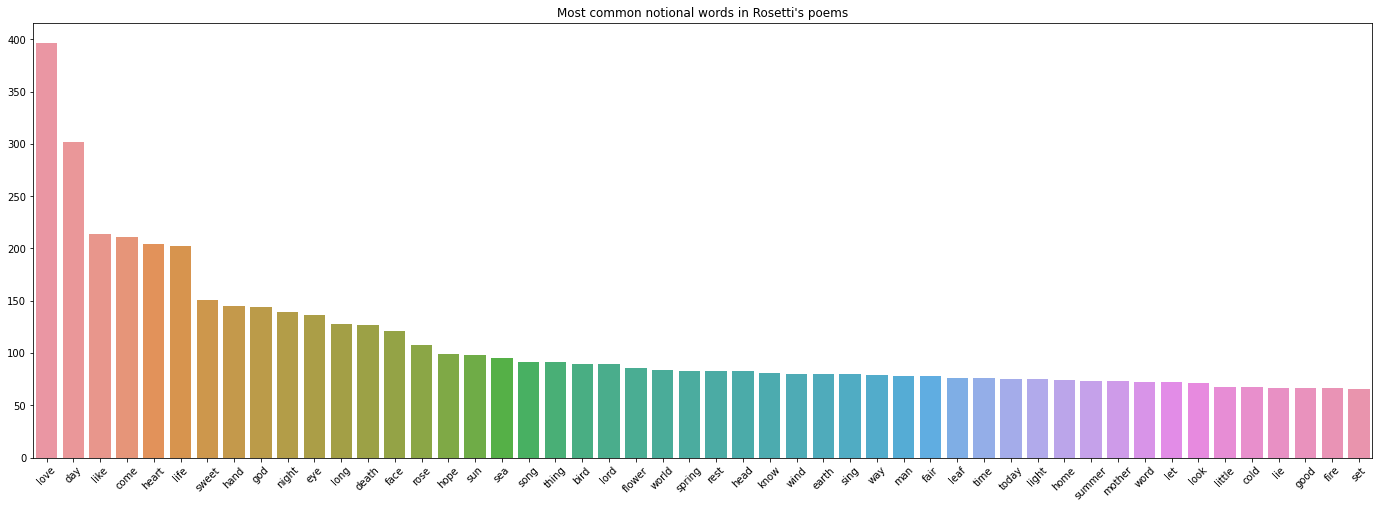

In [46]:
#most common word occurences can offer insights into poetry themes
term_occ = Counter(lemmed_poetry)
common_words = term_occ.most_common(50)
print(common_words)

x = [i[0] for i in common_words]
y = [i[1] for i in common_words]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("Most common notional words in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

[('day', 302), ('love', 209), ('heart', 204), ('life', 202), ('hand', 145), ('night', 139), ('eye', 136), ('death', 127), ('face', 112), ('god', 96), ('sea', 92), ('thing', 91), ('world', 84), ('bird', 79), ('way', 79), ('man', 78), ('spring', 77), ('time', 76), ('song', 75), ('today', 75), ('lord', 75), ('home', 73), ('summer', 73), ('head', 72), ('word', 72), ('sun', 69), ('year', 65), ('rest', 64), ('hour', 63), ('dream', 62), ('voice', 62), ('fire', 62), ('earth', 60), ('hope', 57), ('mother', 57), ('foot', 54), ('wind', 54), ('land', 54), ('flower', 54), ('tomorrow', 53), ('vanity', 52), ('fruit', 49), ('look', 49), ('leaf', 49), ('watch', 47), ('half', 46), ('soul', 46), ('water', 45), ('praise', 45), ('lie', 44)]


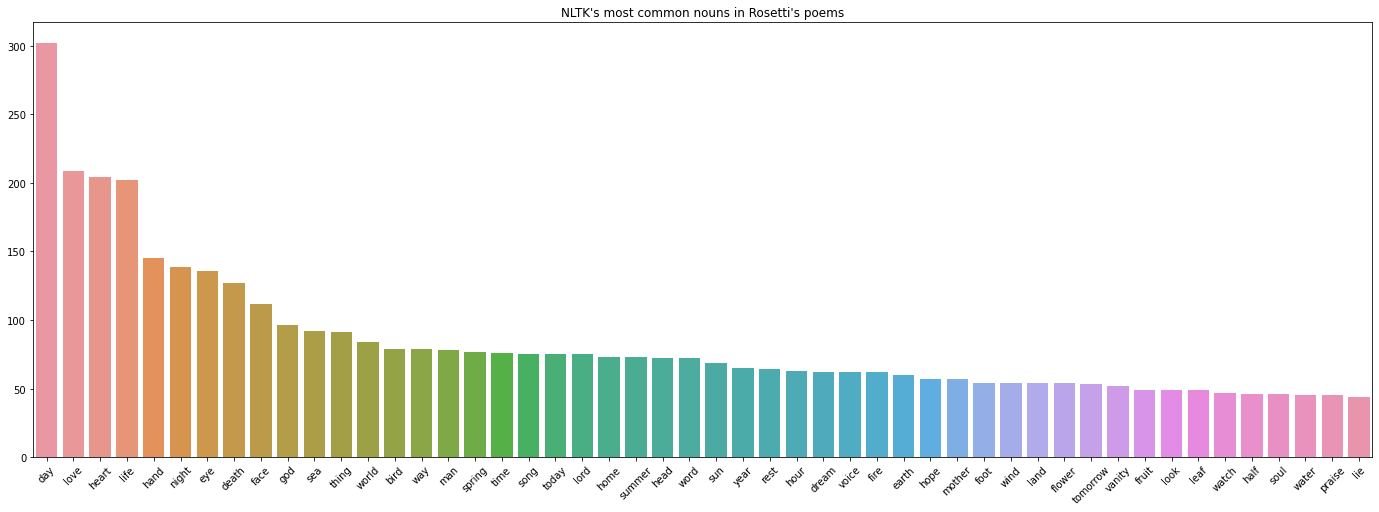

In [47]:
nouns = [word[0] for word in tagged_poetry if word[1] == 'NN']
noun_count = Counter(nouns)
common_nouns = noun_count.most_common(50)
print(common_nouns)

x = [i[0] for i in common_nouns]
y = [i[1] for i in common_nouns]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("NLTK's most common nouns in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

In [48]:
#more accurate POS-tagging with Stanford's Stanza (https://stanfordnlp.github.io/stanza/pos.html)
poetry_str = " ".join(poetry_tokens)
poetry_str[0:200]

doc = nlps(poetry_str)
output = [f'{word.lemma}: {word.xpos}' for sent in doc.sentences for word in sent.words]
tokens = [i.split(":") for i in output]

[('day', 216), ('love', 203), ('life', 176), ('heart', 172), ('night', 128), ('death', 120), ('hand', 99), ('face', 91), ('sun', 90), ('sea', 81), ('world', 81), ('spring', 76), ('song', 74), ('today', 74), ('man', 74), ('summer', 72), ('head', 71), ('earth', 69), ('time', 68), ('mother', 66), ('hope', 63), ('wind', 61), ('way', 61), ('rest', 59), ('fire', 59), ('light', 56), ('tomorrow', 53), ('land', 52), ('home', 51), ('bird', 48), ('rose', 48), ('voice', 48), ('friend', 47), ('soul', 46), ('sight', 45), ('lord', 45), ('pain', 43), ('door', 43), ('air', 42), ('moon', 41), ('have', 41), ('breath', 39), ('half', 38), ('dream', 37), ('heaven', 37), ('hour', 36), ('word', 36), ('strength', 36), ('gold', 35), ('tree', 35)]


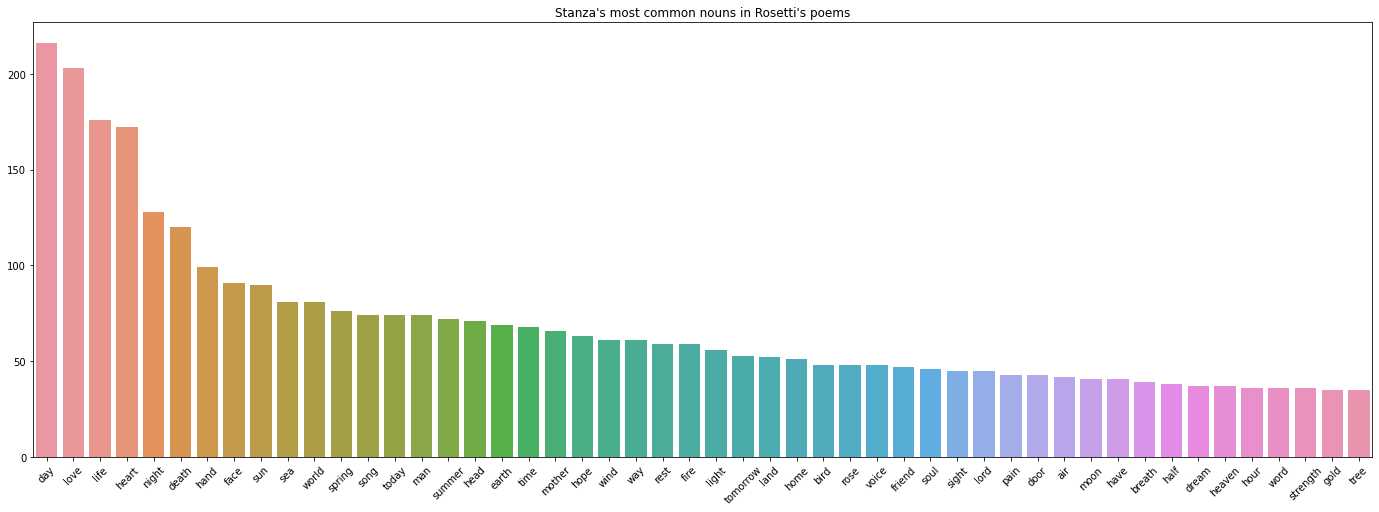

In [49]:
nouns = [word[0].lower().strip() for word in tokens if word[1].strip() == 'NN']
ros_nouns_count = Counter(nouns)
ros_nouns = list(set(nouns))
#ros_nouns[100:200]
print(nouns_count.most_common(50))

x = [i[0] for i in nouns_count.most_common(50)]
y = [i[1] for i in nouns_count.most_common(50)]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("Stanza's most common nouns in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

[('love', 78), ('come', 31), ('remember', 27), ('run', 17), ('let', 17), ('forget', 10), ('hold', 10), ('look', 8), ('tell', 8), ('feel', 8), ('buy', 7), ('go', 7), ('find', 7), ('grow', 6), ('soar', 6), ('build', 6), ('arise', 6), ('raise', 5), ('know', 4), ('begin', 4), ('stand', 4), ('follow', 4), ('break', 4), ('meet', 4)]


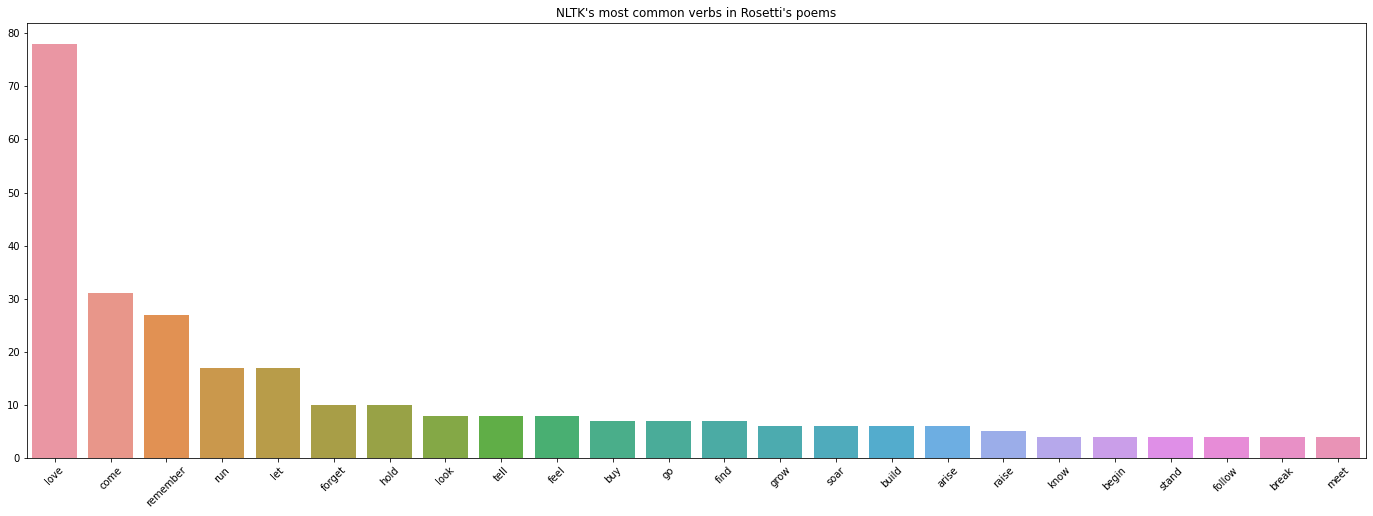

In [50]:
incorrect_labels = {'dove'}
verbs = [word[0] for word in tagged_poetry if word[1] == 'VB']
verbs_cor = [word for word in verbs if word not in incorrect_labels]
verb_count = Counter(verbs_cor)
common_verbs = verb_count.most_common(24)
print(common_verbs)
#faulty tagging, fixed partly with incorrect_labels array -> not a viable solution

x = [i[0] for i in common_verbs]
y = [i[1] for i in common_verbs]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("NLTK's most common verbs in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

[('be', 254), ('come', 107), ('see', 79), ('love', 68), ('have', 65), ('let', 65), ('give', 60), ('sing', 57), ('take', 56), ('make', 49), ('say', 42), ('look', 41), ('do', 41), ('die', 41), ('go', 40), ('find', 35), ('hear', 33), ('tell', 33), ('live', 30), ('stay', 28), ('remember', 27), ('bring', 27), ('think', 27), ('keep', 27), ('stand', 27), ('watch', 26), ('set', 26), ('buy', 25), ('hold', 24), ('bear', 23), ('pass', 23), ('know', 23), ('seek', 22), ('wake', 22), ('meet', 22), ('sleep', 22), ('forget', 21), ('sit', 20), ('rest', 20), ('speak', 20), ('follow', 19), ('leave', 19), ('wait', 19), ('rise', 19), ('weep', 19), ('break', 16), ('grow', 16), ('arise', 15), ('fill', 15), ('call', 15)]


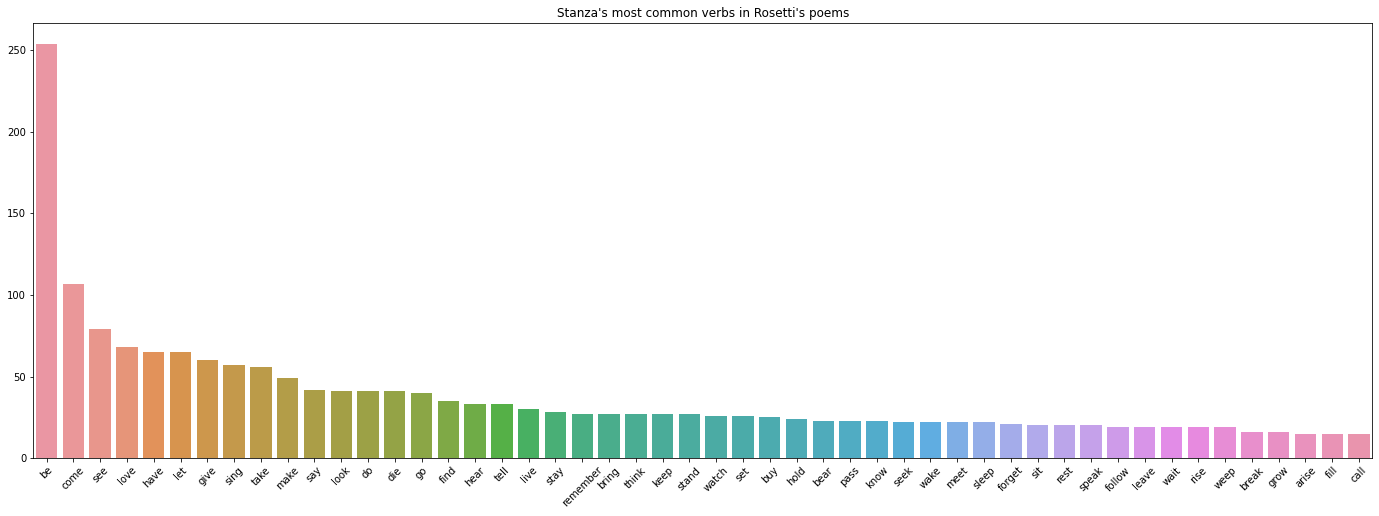

In [51]:
verbs = [word[0].lower().strip() for word in tokens if word[1].strip() == 'VB']
verbs_count = Counter(verbs)
ros_verbs = list(set(verbs))
#ros_verbs[0:100]
print(verbs_count.most_common(50))

x = [i[0] for i in verbs_count.most_common(50)]
y = [i[1] for i in verbs_count.most_common(50)]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("Stanza's most common verbs in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()
#a much better result all around

[('sweet', 113), ('good', 67), ('little', 66), ('fair', 64), ('green', 62), ('old', 61), ('dead', 60), ('white', 60), ('golden', 59), ('strong', 58), ('light', 47), ('new', 44), ('deep', 38), ('live', 37), ('high', 37), ('open', 36), ('cold', 36), ('dear', 35), ('young', 33), ('soft', 33), ('poor', 29), ('low', 29), ('slow', 29), ('long', 29), ('free', 28), ('silent', 26), ('pale', 26), ('great', 26), ('small', 26), ('weary', 25), ('happy', 24), ('weak', 24), ('red', 23), ('short', 23), ('secret', 22)]


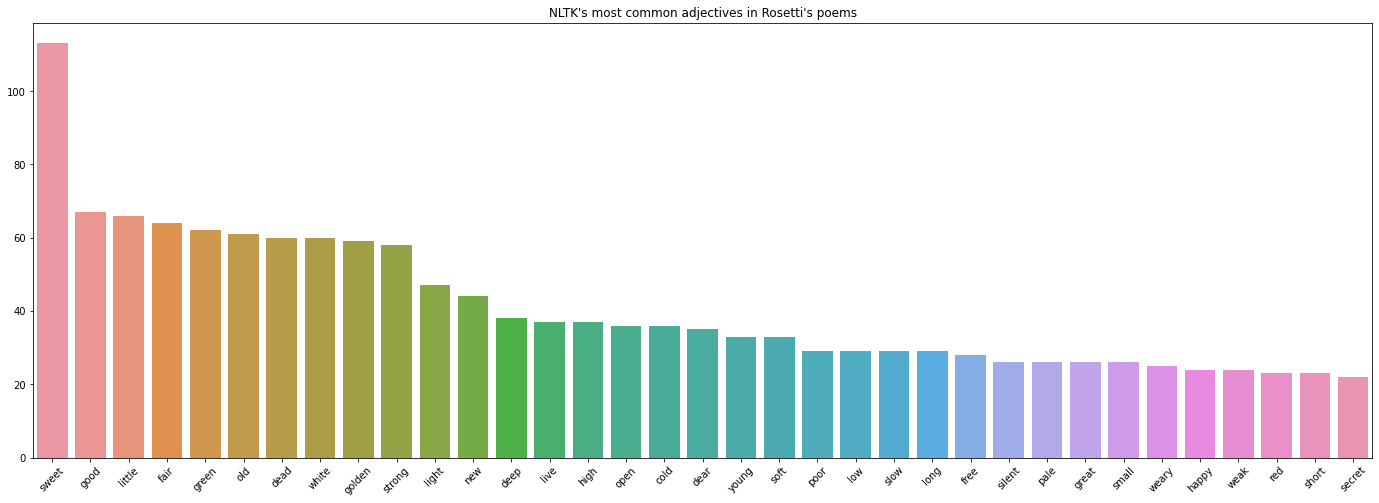

In [52]:
incorrect_labels = {'come', 'tree', 'sleep', 'sun', 'second', 'sigh', 'hear', 'god'}
adjs = [word[0] for word in tagged_poetry if word[1] == 'JJ']
adjs_cor = [word for word in adjs if word not in incorrect_labels]
adj_count = Counter(adjs_cor)
common_adjs = adj_count.most_common(35)
print(common_adjs)

x = [i[0] for i in common_adjs]
y = [i[1] for i in common_adjs]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("NLTK's most common adjectives in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

[('sweet', 139), ('last', 79), ('fair', 74), ('cold', 67), ('full', 63), ('good', 61), ('strong', 58), ('dead', 57), ('little', 57), ('own', 57), ('white', 57), ('golden', 56), ('old', 56), ('first', 53), ('dear', 51), ('such', 50), ('green', 47), ('other', 45), ('long', 44), ('new', 41), ('tender', 34), ('many', 33), ('deep', 33), ('soft', 33), ('high', 33), ('pale', 31), ('silent', 30), ('slow', 29), ('free', 28), ('young', 27), ('poor', 26), ('weary', 25), ('warm', 25), ('low', 25), ('small', 25), ('second', 25), ('pleasant', 24), ('happy', 24), ('great', 24), ('weak', 24), ('red', 23), ('wise', 23), ('short', 23), ('sore', 21), ('sad', 21), ('dark', 20), ('past', 20), ('very', 20), ('true', 20), ('safe', 20)]


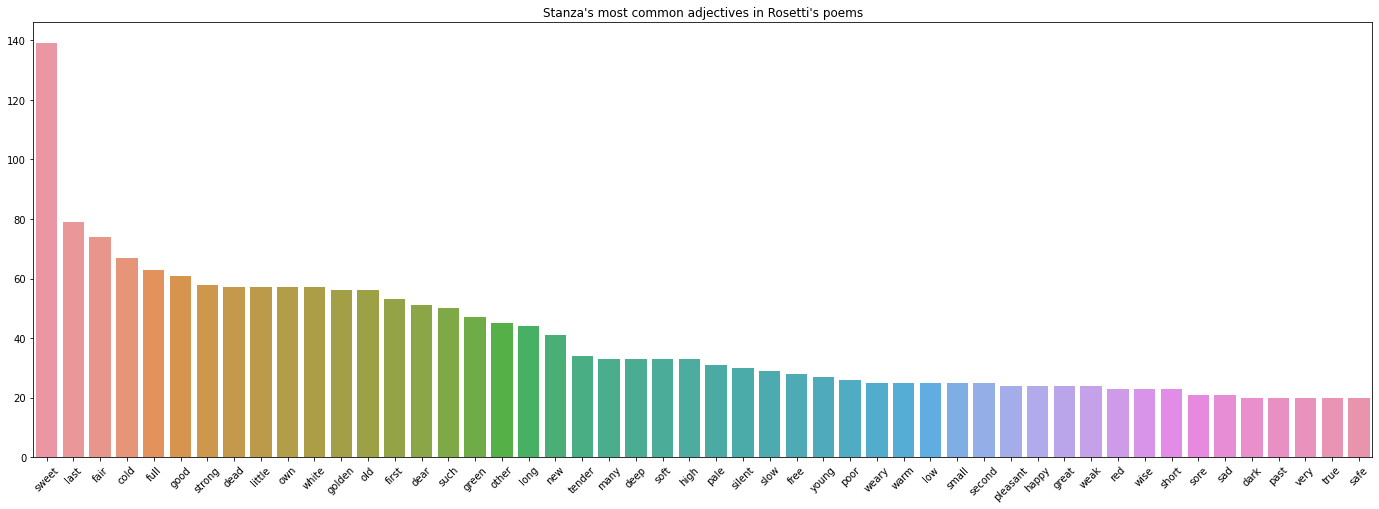

In [53]:
adjs = [word[0].lower().strip() for word in tokens if word[1].strip() == 'JJ']
adjs_count = Counter(adjs)
ros_adjs = list(set(adjs))
#ros_adjs[100:200]
print(adjs_count.most_common(50))

x = [i[0] for i in adjs_count.most_common(50)]
y = [i[1] for i in adjs_count.most_common(50)]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("Stanza's most common adjectives in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

[('long', 99), ('far', 58), ('lily', 39), ('ago', 27), ('soon', 21), ('fast', 18), ('surely', 17), ('right', 12), ('scarcely', 11), ('forever', 10), ('heavenly', 9), ('late', 8), ('close', 8), ('stately', 8), ('aside', 7), ('twice', 6), ('alike', 6), ('somewhat', 6), ('apart', 6), ('early', 5), ('instead', 5), ('merely', 5), ('utterly', 4), ('verily', 4), ('evermore', 4), ('comely', 4), ('slowly', 4), ('earthly', 4), ('softly', 4), ('forevermore', 3)]


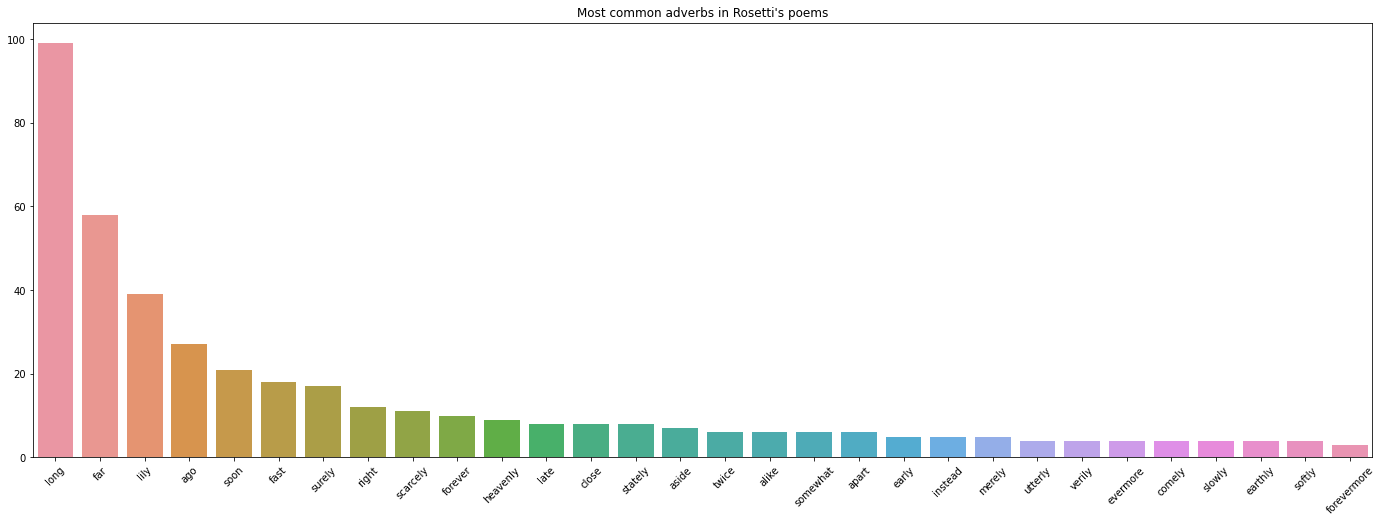

In [54]:
incorrect_labels = {'lovely', 'heard', 'sore', 'art', 'yea', 'father', 'milly', 'bride', 'heaven', 'bore', 'mother', 'sister', 'pretty', 'nell', 'ere', 'woolly', 'song', 'brother', 'nay', 'noon', 'longer', 'earth', 'shore', 'chilly', 'sere', 'folly', 'nought', 'later', 'tide'}
advs = [word[0] for word in tagged_poetry if word[1] == 'RB']
advs_cor = [word for word in advs if word not in incorrect_labels]
adv_count = Counter(advs_cor)
common_advs = adv_count.most_common(30)
print(common_advs)

x = [i[0] for i in common_advs]
y = [i[1] for i in common_advs]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("Most common adverbs in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

[('not', 556), ('so', 283), ('then', 128), ('now', 126), ('still', 114), ('never', 98), ('away', 95), ('too', 93), ('again', 88), ('here', 87), ('long', 82), ('there', 75), ('only', 64), ('far', 56), ('alone', 55), ('once', 54), ('ever', 52), ('back', 43), ('no', 39), ('even', 37), ('thus', 37), ('just', 32), ('together', 31), ('yet', 31), ('fast', 31), ('ago', 29), ('as', 27), ('much', 27), ('forth', 27), ('down', 26), ('almost', 26), ('sometimes', 24), ('perhaps', 24), ('indeed', 23), ('soon', 21), ('though', 20), ('before', 19), ('all', 17), ('home', 16), ('quite', 16), ('surely', 16), ('late', 15), ('well', 15), ('therefore', 14), ('near', 14), ('out', 13), ('asleep', 13), ('first', 13), ('very', 12), ('above', 12)]


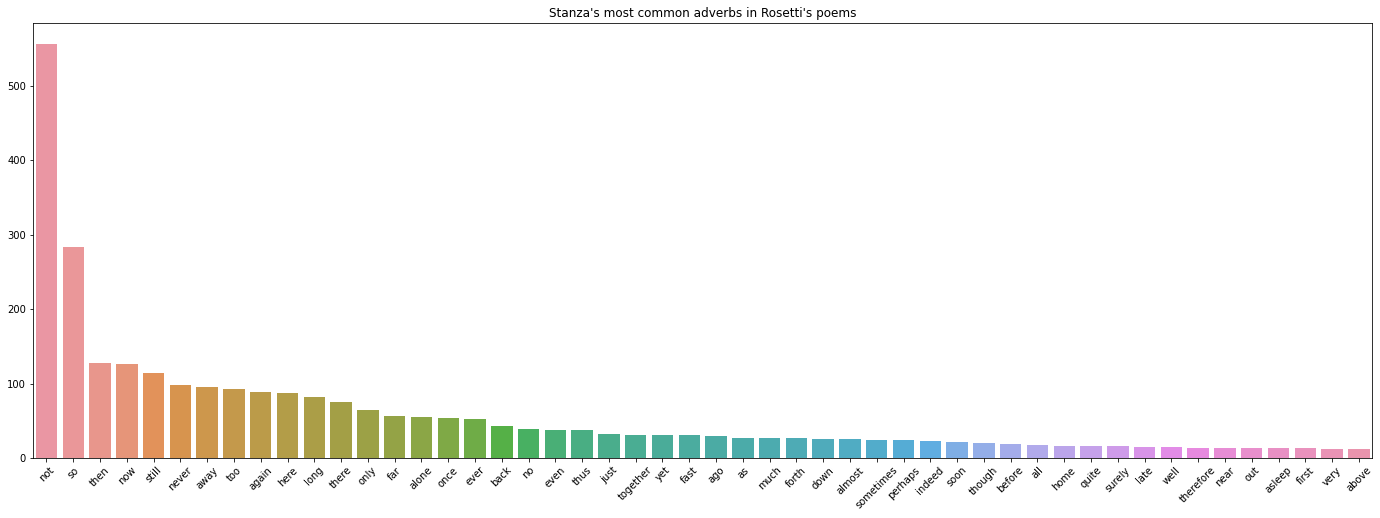

In [55]:
advs = [word[0].lower().strip() for word in tokens if word[1].strip() == 'RB']
advs_count = Counter(advs)
ros_advs = list(set(advs))
#ros_adjs[100:200]
print(advs_count.most_common(50))

x = [i[0] for i in advs_count.most_common(50)]
y = [i[1] for i in advs_count.most_common(50)]

plt.figure(figsize=[24,8])
sns.barplot(x=x, y=y).set_title("Stanza's most common adverbs in Rosetti's poems")
plt.xticks(rotation=45)
plt.show()

# Final thoughts

There is no doubt that Stanza's pos-tagging capabilities are far more advanced when compared to NLTK and Spacy. The tagged corpus produced by using the former can be successfully integrated into any text-generative models, including chatbots.

From a linguistic perspective, after analyzing the most common words in Rossetti's poetry, it becomes evident that the most pronounced themes in the poems include love, life and death, body allusions, nature and time (especially the change of seasons).